<a href="https://colab.research.google.com/github/katemartian/LHoutputsManuscript/blob/master/Fig7_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Fig7 stats

This notebook contains statistical analysis of the data from the figure 7 and its supplemental figures.

# Install libraries

Install all necessary libraries to run statistical tests in R.

In [ ]:
# Use R in Jupyter Notebook
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("readxl")
install.packages("dplyr")

install.packages("ggplot2")

install.packages("nlme")
install.packages("multcomp")

In [ ]:
%%R
library("readxl")
library("dplyr")

library("ggplot2")

library("nlme")
library("multcomp")

And run function at the end of the notebook.

# Directory

Set directory with the source data. Mount disk if you use Google Colab.

In [ ]:
# Mount disk if you use Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/sourcedata

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/sourcedata


# SCT Average duration Fig7B

In [ ]:
%%R
df <- read_excel("fig7_LHopto_RTPP-SCT.xlsx", sheet = "SCTavgDuration")
df$group = as.factor(df$group)
df$output = as.factor(df$output)
df$measure = as.numeric(df$measure)

In [ ]:
%%R
neworder <- c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb')
df <- arrange(transform(df, output=factor(output,levels=neworder)),output)
df$output <- factor(df$output, labels = c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb'))

In [ ]:
%%R
chr2 <- df[df$group=="ChR2",]
eyfp <- df[df$group=="eYFP",]

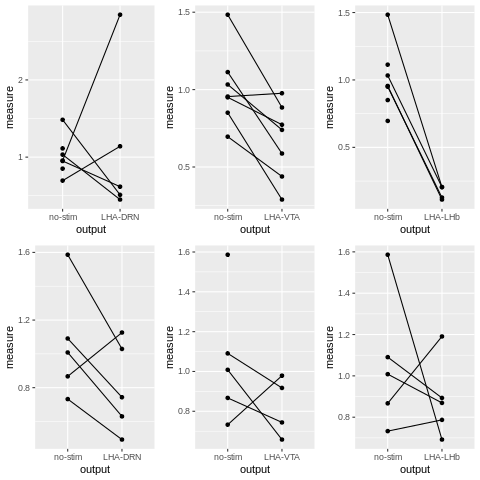

In [ ]:
%%R
p1 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p3 <- ggplot(chr2[(chr2$output!="LHA-VTA" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p4 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p5 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p6 <- ggplot(eyfp[(eyfp$output!="LHA-VTA" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p4, p2,p5, p3,p6, cols=3)

Repeated measures ANOVA on ranks with Dunnet poshoc analysis

In [ ]:
%%R
anova <- aov(rank(measure) ~ group*output, random=~1|mouse, data=df)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
group         1    160   159.5   1.042  0.314
output        3    968   322.8   2.108  0.116
group:output  3    454   151.4   0.989  0.409
Residuals    36   5513   153.1               


In [ ]:
%%R
print("--------------------- ChR2-eYFP --------------------")
model1 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="ChR2",], na.action=na.omit)
print(summary(glht(model1, linfct=mcp(output="Dunnet"), corr="bonferonni")))

print("----------------------- eYFP ----------------------")
model2 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="eYFP",], na.action=na.omit)
print(summary(glht(model2, linfct=mcp(output="Dunnet"), corr="bonferonni")))

[1] "--------------------- ChR2-eYFP --------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "ChR2", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
LHA-DRN - no-stim == 0   -3.200      2.864  -1.117    0.559    
LHA-VTA - no-stim == 0   -5.857      2.615  -2.240    0.068 .  
LHA-LHb - no-stim == 0  -14.500      3.066  -4.729   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------- eYFP ----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "eYFP", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
  

# SCT Interval between consumptions Fig7C

In [ ]:
%%R
df <- read_excel("fig7_LHopto_RTPP-SCT.xlsx", sheet = "SCTinterval")
df$group = as.factor(df$group)
df$output = as.factor(df$output)
df$measure = as.numeric(df$measure)

In [ ]:
%%R
neworder <- c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb')
df <- arrange(transform(df, output=factor(output,levels=neworder)),output)
df$output <- factor(df$output, labels = c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb'))

In [ ]:
%%R
chr2 <- df[df$group=="ChR2",]
eyfp <- df[df$group=="eYFP",]

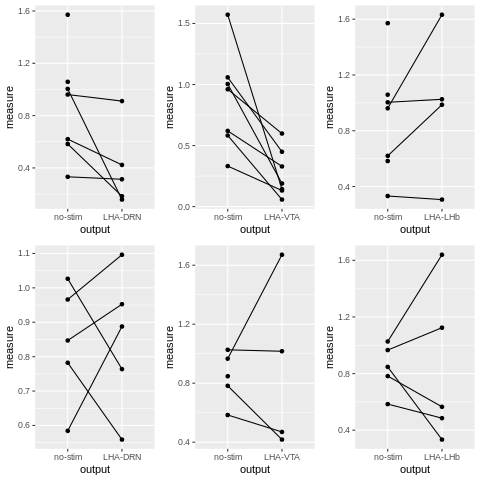

In [ ]:
%%R
p1 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p3 <- ggplot(chr2[(chr2$output!="LHA-VTA" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p4 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p5 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p6 <- ggplot(eyfp[(eyfp$output!="LHA-VTA" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p4, p2,p5, p3,p6, cols=3)

Repeated measures ANOVA on ranks with Dunnet poshoc analysis

In [ ]:
%%R
anova <- aov(rank(measure) ~ group*output, random=~1|mouse, data=df)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)  
group         1    374   373.5   2.865 0.0992 .
output        3   1180   393.2   3.016 0.0424 *
group:output  3    849   283.0   2.171 0.1084  
Residuals    36   4693   130.4                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print("--------------------- ChR2-eYFP --------------------")
model1 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="ChR2",], na.action=na.omit)
print(summary(glht(model1, linfct=mcp(output="Dunnet"), corr="bonferonni")))

print("----------------------- eYFP ----------------------")
model2 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="eYFP",], na.action=na.omit)
print(summary(glht(model2, linfct=mcp(output="Dunnet"), corr="bonferonni")))

[1] "--------------------- ChR2-eYFP --------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "ChR2", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
LHA-DRN - no-stim == 0  -7.1519     2.1384  -3.344  0.00248 ** 
LHA-VTA - no-stim == 0 -10.0000     1.8987  -5.267  < 0.001 ***
LHA-LHb - no-stim == 0   0.3471     2.3161   0.150  0.99785    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------- eYFP ----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "eYFP", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
  

# SCT Number of consumptions Fig7D

In [ ]:
%%R
df <- read_excel("fig7_LHopto_RTPP-SCT.xlsx", sheet = "SCTnumber")
df$group = as.factor(df$group)
df$output = as.factor(df$output)
df$auc = as.numeric(df$measure)

In [ ]:
%%R
neworder <- c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb')
df <- arrange(transform(df, output=factor(output,levels=neworder)),output)
df$output <- factor(df$output, labels = c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb'))

In [ ]:
%%R
chr2 <- df[df$group=="ChR2",]
eyfp <- df[df$group=="eYFP",]

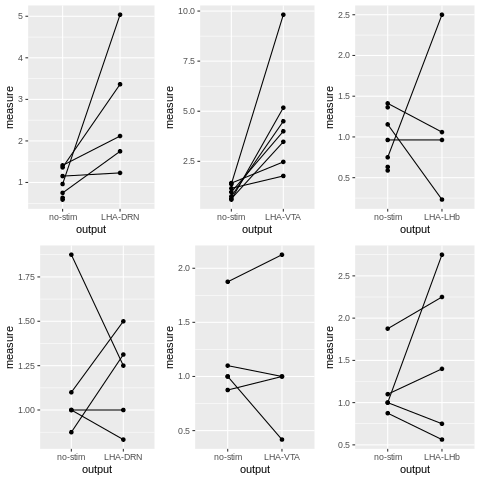

In [ ]:
%%R
p1 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p3 <- ggplot(chr2[(chr2$output!="LHA-VTA" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p4 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p5 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p6 <- ggplot(eyfp[(eyfp$output!="LHA-VTA" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p4, p2,p5, p3,p6, cols=3)

Repeated measures ANOVA on ranks with Dunnet poshoc analysis

In [ ]:
%%R
anova <- aov(rank(measure) ~ group*output, random=~1|mouse, data=df)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)   
group         1  498.2   498.2   5.372 0.0266 * 
output        3 1279.9   426.6   4.600 0.0083 **
group:output  3 1228.1   409.4   4.414 0.0100 * 
Residuals    34 3153.2    92.7                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print("--------------------- ChR2-eYFP --------------------")
model1 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="ChR2",], na.action=na.omit)
print(summary(glht(model1, linfct=mcp(output="Dunnet"), corr="bonferonni")))

print("----------------------- eYFP ----------------------")
model2 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="eYFP",], na.action=na.omit)
print(summary(glht(model2, linfct=mcp(output="Dunnet"), corr="bonferonni")))

[1] "--------------------- ChR2-eYFP --------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "ChR2", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
LHA-DRN - no-stim == 0    8.329      2.459   3.387  0.00202 ** 
LHA-VTA - no-stim == 0   12.357      2.234   5.532  < 1e-04 ***
LHA-LHb - no-stim == 0    1.246      2.641   0.472  0.94102    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------- eYFP ----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "eYFP", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
  

# SCT Total duration Fig7E


In [ ]:
%%R
df <- read_excel("fig7_LHopto_RTPP-SCT.xlsx", sheet = "SCTtotalDuration")
df$group = as.factor(df$group)
df$output = as.factor(df$output)
df$measure = as.numeric(df$measure)

In [ ]:
%%R
neworder <- c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb')
df <- arrange(transform(df, output=factor(output,levels=neworder)),output)
df$output <- factor(df$output, labels = c('no-stim','LHA-DRN','LHA-VTA','LHA-LHb'))

In [ ]:
%%R
chr2 <- df[df$group=="ChR2",]
eyfp <- df[df$group=="eYFP",]

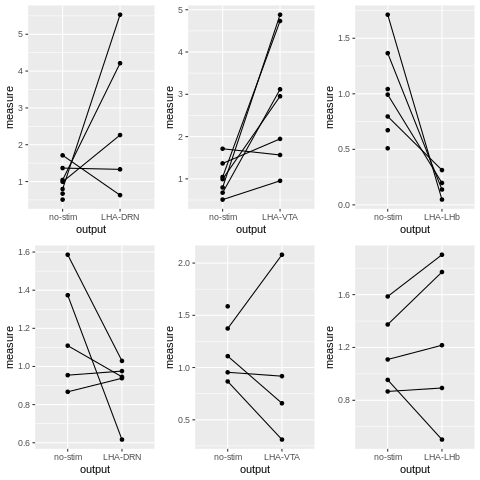

In [ ]:
%%R
p1 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(chr2[(chr2$output!="LHA-LHb" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p3 <- ggplot(chr2[(chr2$output!="LHA-VTA" & chr2$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p4 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-VTA"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p5 <- ggplot(eyfp[(eyfp$output!="LHA-LHb" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
p6 <- ggplot(eyfp[(eyfp$output!="LHA-VTA" & eyfp$output!="LHA-DRN"),], aes(x=output, y=measure)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p4, p2,p5, p3,p6, cols=3)

Repeated measures ANOVA on ranks with Dunnet poshoc analysis

In [ ]:
%%R
anova <- aov(rank(measure) ~ group*output, random=~1|mouse, data=df)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
group         1  135.2   135.2   1.532 0.224304    
output        3  943.8   314.6   3.566 0.024053 *  
group:output  3 2091.9   697.3   7.903 0.000393 ***
Residuals    34 2999.7    88.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print("--------------------- ChR2-eYFP --------------------")
model1 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="ChR2",], na.action=na.omit)
print(summary(glht(model1, linfct=mcp(output="Dunnet"), corr="bonferonni")))

print("----------------------- eYFP ----------------------")
model2 <- lme(rank(measure)~output, random=~1|mouse, data=df[df$group=="eYFP",], na.action=na.omit)
print(summary(glht(model2, linfct=mcp(output="Dunnet"), corr="bonferonni")))

[1] "--------------------- ChR2-eYFP --------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "ChR2", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)   
LHA-DRN - no-stim == 0    5.287      2.389   2.213  0.07272 . 
LHA-VTA - no-stim == 0    7.143      2.151   3.320  0.00265 **
LHA-LHb - no-stim == 0   -7.571      2.576  -2.939  0.00941 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------- eYFP ----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(measure) ~ output, data = df[df$group == 
    "eYFP", ], random = ~1 | mouse, na.action = na.omit)

Linear Hypotheses:
      

# RTPP SuppFig1B

In [ ]:
%%R
df <- read_excel("fig7_LHopto_RTPP-SCT.xlsx", sheet="RTPP")
df$group = as.factor(df$group)
df$output = as.factor(df$output)
df$score = as.numeric(df$score)

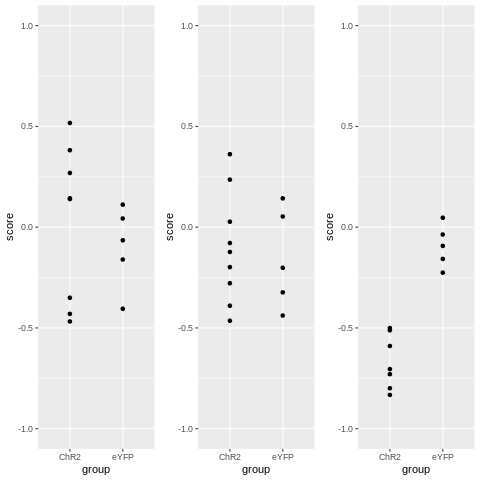

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=group, y=score)) + geom_point() + ylim(-1,1)
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=group, y=score)) + geom_point() + ylim(-1,1)
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=group, y=score)) + geom_point() + ylim(-1,1)
multiplot(p1,p2,p3, cols=3)

Compare to 0

In [ ]:
%%R
print(c("ChR2 LHA-DRN", t.test(df[(df$group=="ChR2" & df$output=="LHA-DRN"),]$score, mu=0)$p.value))
print(c("ChR2 LHA-VTA", t.test(df[(df$group=="ChR2" & df$output=="LHA-VTA"),]$score, mu=0)$p.value))
print(c("ChR2 LHA-LHb", t.test(df[(df$group=="ChR2" & df$output=="LHA-LHb"),]$score, mu=0)$p.value))
print("")
print(c("eYFP LHA-DRN", t.test(df[(df$group=="eYFP" & df$output=="LHA-DRN"),]$score, mu=0)$p.value))
print(c("eYFP LHA-DRN", t.test(df[(df$group=="eYFP" & df$output=="LHA-VTA"),]$score, mu=0)$p.value))
print(c("eYFP LHA-DRN", t.test(df[(df$group=="eYFP" & df$output=="LHA-LHb"),]$score, mu=0)$p.value))

[1] "ChR2 LHA-DRN"      "0.858745114089463"
[1] "ChR2 LHA-VTA"      "0.302239235635755"
[1] "ChR2 LHA-LHb"         "1.18885255670219e-05"
[1] ""
[1] "eYFP LHA-DRN"      "0.351501296090827"
[1] "eYFP LHA-DRN"      "0.236275519472289"
[1] "eYFP LHA-DRN"      "0.119614071952133"


In [ ]:
%%R
fit <- aov(rank(score) ~ group*output, random=~1|mouse, data = df)
print(summary(fit))
print(TukeyHSD(fit))

             Df Sum Sq Mean Sq F value  Pr(>F)   
group         1  156.4   156.4   1.951 0.17185   
output        2 1213.4   606.7   7.565 0.00198 **
group:output  2  923.5   461.8   5.758 0.00716 **
Residuals    33 2646.6    80.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rank(score) ~ group * output, data = df, random = ~1 | mouse)

$group
              diff       lwr      upr     p adj
eYFP-ChR2 4.116667 -1.880292 10.11362 0.1718535

$output
                      diff        lwr       upr     p adj
LHA-LHb-LHA-DRN -13.362714 -22.159720 -4.565707 0.0020400
LHA-VTA-LHA-DRN  -3.117674 -11.581630  5.346282 0.6417266
LHA-VTA-LHA-LHb  10.245040   1.600154 18.889925 0.0172957

$`group:output`
                                   diff        lwr       upr     p adj
eYFP:LHA-DRN-ChR2:LHA-DRN -3.300000e+00 -18.736366 12.136366 0.9864232
ChR2:LHA-LHb-ChR2:LHA-

# Functions

In [ ]:
%%R
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  require(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}